In [ ]:
#task 3
#CUSTOMER CHURN PREDICTION

In [2]:
#step 1: importing lib
# Data handling
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Machine Learning
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

# Evaluation
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [4]:
#STEP 2: Load the dataset (view it)
import pandas as pd

df = pd.read_csv(r"C:\Users\omkar\Downloads\BankCustomerChurnPrediction\Churn_Modelling.csv")
df.head()



,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [5]:
#STEP 3: Basic Data Exploration (Alternative)
# Check shape and columns
print("Dataset shape:", df.shape)
print("Columns:", df.columns.tolist())

# Info & missing values
df.info()
print("\nMissing values:\n", df.isnull().sum())

# Target variable distribution
print("\nExited distribution:\n", df['Exited'].value_counts())

Dataset shape: (10000, 14)
Columns: ['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'Exited']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 no

In [6]:
#STEP 4: Drop Irrelevant Columns
cols_to_drop = ['RowNumber', 'CustomerId', 'Surname']
df = df.drop(columns=cols_to_drop, errors='ignore')

df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [7]:
#STEP 5: Encode Categorical Variables (Alternative)
# One-hot encoding for Geography & Gender
df = pd.get_dummies(df, columns=['Geography', 'Gender'], drop_first=True)

df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,False,False,False
1,608,41,1,83807.86,1,0,1,112542.58,0,False,True,False
2,502,42,8,159660.80,3,1,0,113931.57,1,False,False,False
3,699,39,1,0.00,2,0,0,93826.63,0,False,False,False
4,850,43,2,125510.82,1,1,1,79084.10,0,False,True,False


In [8]:
#STEP 6: Split Features & Target
X = df.drop('Exited', axis=1)
y = df['Exited']

print("Feature shape:", X.shape)
print("Target shape:", y.shape)

Feature shape: (10000, 11)
Target shape: (10000,)


In [9]:
#STEP 7: Train-Test Split (Stratified Optional)
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

print(f"Training samples: {len(X_train)}, Testing samples: {len(X_test)}")

Training samples: 8000, Testing samples: 2000


In [10]:
#STEP 8: Feature Scaling (Alternative)
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled  = scaler.transform(X_test)

In [11]:
#STEP 9: Logistic Regression Model
from sklearn.linear_model import LogisticRegression

lr_model = LogisticRegression(max_iter=2000, class_weight='balanced')
lr_model.fit(X_train_scaled, y_train)

y_pred_lr = lr_model.predict(X_test_scaled)

Logistic Regression Accuracy: 0.7135

Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.72      0.80      1593
           1       0.39      0.70      0.50       407

    accuracy                           0.71      2000
   macro avg       0.65      0.71      0.65      2000
weighted avg       0.80      0.71      0.74      2000



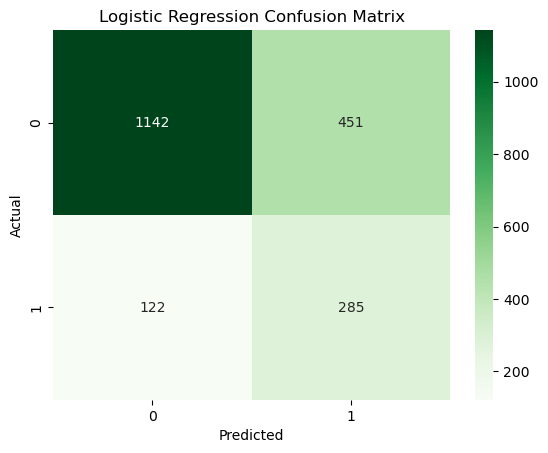

In [12]:
#STEP 10: Evaluate Logistic Regression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_lr))
print("\nClassification Report:\n", classification_report(y_test, y_pred_lr))

sns.heatmap(confusion_matrix(y_test, y_pred_lr), annot=True, fmt='d', cmap='Greens')
plt.title("Logistic Regression Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [13]:
#STEP 11: Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(
    n_estimators=150,
    max_depth=10,
    min_samples_split=50,
    class_weight='balanced',
    random_state=42,
    n_jobs=-1
)

rf_model.fit(X_train_scaled, y_train)
y_pred_rf = rf_model.predict(X_test_scaled)

Random Forest Accuracy: 0.823

Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.85      0.88      1593
           1       0.55      0.72      0.62       407

    accuracy                           0.82      2000
   macro avg       0.74      0.78      0.75      2000
weighted avg       0.85      0.82      0.83      2000



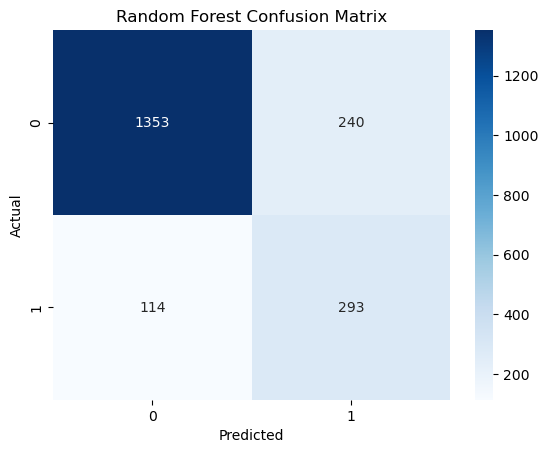

In [14]:
#STEP 12: Evaluate Random Forest
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print("\nClassification Report:\n", classification_report(y_test, y_pred_rf))

sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True, fmt='d', cmap='Blues')
plt.title("Random Forest Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

C:\Users\omkar\AppData\Local\Temp\ipykernel_24392\1185375569.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feat_imp, palette="viridis")


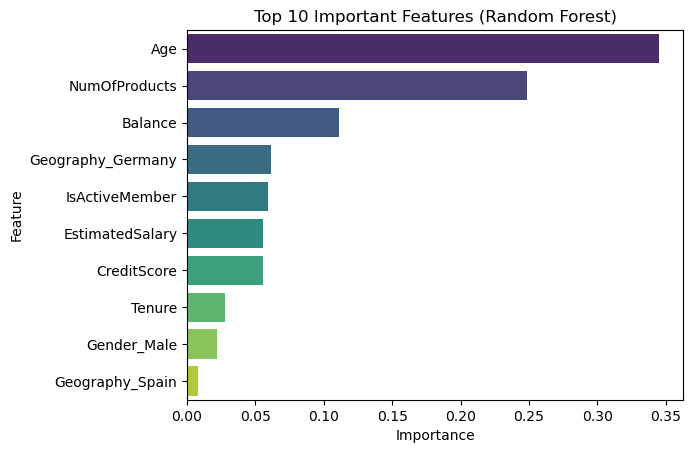

In [15]:
#STEP 13: Feature Importance (Top 10)
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

feat_imp = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rf_model.feature_importances_
}).sort_values(by='Importance', ascending=False).head(10)

sns.barplot(x='Importance', y='Feature', data=feat_imp, palette="viridis")
plt.title("Top 10 Important Features (Random Forest)")
plt.show()


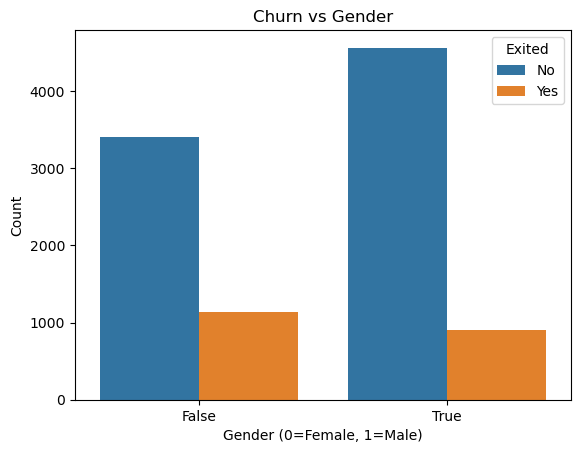

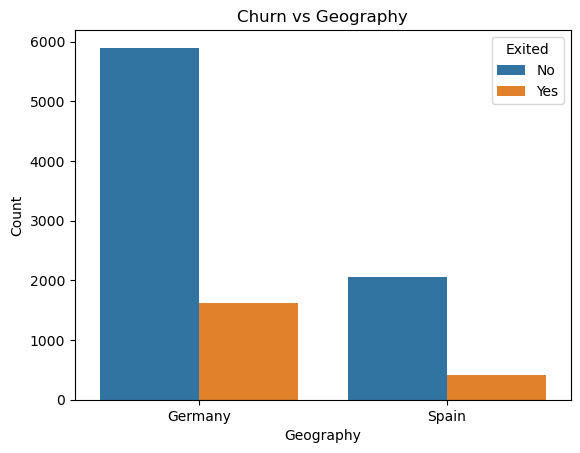

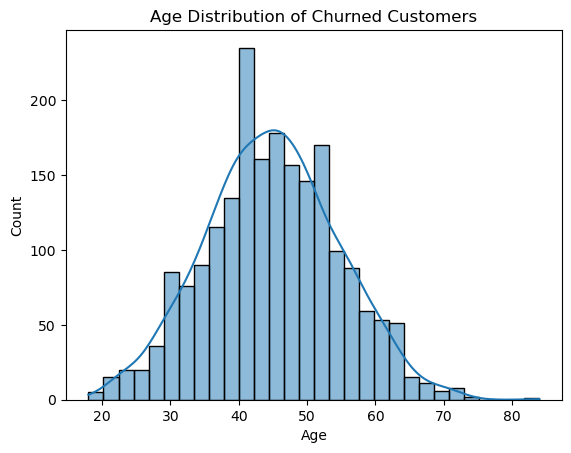

In [16]:
#STEP 14: Data Visualization (Alternative)
# Churn vs Gender
sns.countplot(x='Gender_Male', hue='Exited', data=df)
plt.title("Churn vs Gender")
plt.xlabel("Gender (0=Female, 1=Male)")
plt.ylabel("Count")
plt.legend(title="Exited", labels=["No", "Yes"])
plt.show()

# Churn vs Geography
geo_cols = [c for c in df.columns if 'Geography' in c]
df['Geography'] = df[geo_cols].idxmax(axis=1).str.split('_').str[1]

sns.countplot(x='Geography', hue='Exited', data=df)
plt.title("Churn vs Geography")
plt.xlabel("Geography")
plt.ylabel("Count")
plt.legend(title="Exited", labels=["No", "Yes"])
plt.show()

# Age distribution of churned customers
sns.histplot(df[df['Exited'] == 1]['Age'], bins=30, kde=True)
plt.title("Age Distribution of Churned Customers")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()


Gradient Boosting Accuracy: 0.8715

Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.97      0.92      1593
           1       0.80      0.49      0.61       407

    accuracy                           0.87      2000
   macro avg       0.84      0.73      0.77      2000
weighted avg       0.86      0.87      0.86      2000



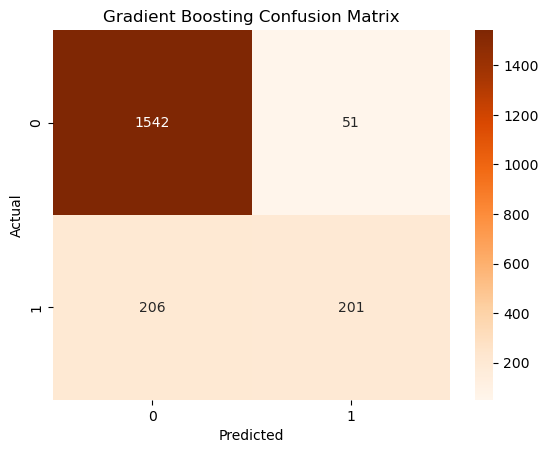

In [17]:
#STEP 15: Gradient Boosting Classifier (Alternative)
from sklearn.ensemble import GradientBoostingClassifier

gb_model = GradientBoostingClassifier(
    n_estimators=200,
    learning_rate=0.05,
    max_depth=4,
    random_state=42
)

gb_model.fit(X_train_scaled, y_train)
y_pred_gb = gb_model.predict(X_test_scaled)

print("Gradient Boosting Accuracy:", accuracy_score(y_test, y_pred_gb))
print("\nClassification Report:\n", classification_report(y_test, y_pred_gb))

sns.heatmap(confusion_matrix(y_test, y_pred_gb), annot=True, fmt='d', cmap='Oranges')
plt.title("Gradient Boosting Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


In [ ]:
#Customer Churn Prediction Task Report

## 1. Introduction

Customer churn is a major challenge for banks and subscription-based businesses. Predicting which customers are likely 
to leave (churn) helps organizations take proactive measures to retain them and reduce revenue loss.

This project focuses on building a **machine learning pipeline** to predict customer churn using features such as 
demographics, account information, and transaction behavior.

---

##  2. Objective

The objectives of this project are:

- To clean and preprocess the dataset for analysis
- To encode categorical variables and scale numerical features
- To train and evaluate multiple machine learning models
- To identify the most important features influencing churn
- To visualize patterns in the dataset

---

##  3. Dataset Description

The dataset contains **customer information from a bank**, with the following key features:

| Feature | Description |
|---------|-------------|
| `CreditScore` | Credit score of the customer |
| `Geography` | Country of residence (France, Spain, Germany) |
| `Gender` | Male or Female |
| `Age` | Customer age |
| `Tenure` | Number of years with the bank |
| `Balance` | Account balance |
| `NumOfProducts` | Number of bank products used |
| `HasCrCard` | Does the customer have a credit card? |
| `IsActiveMember` | Is the customer an active member? |
| `EstimatedSalary` | Estimated annual salary |
| `Exited` | Target variable: 1 = Churned, 0 = Retained |

---

##  4. Data Preprocessing

The preprocessing steps included:

- Dropping irrelevant columns: `RowNumber`, `CustomerId`, `Surname`
- Encoding categorical variables (`Geography`, `Gender`) using one-hot encoding
- Splitting features and target variable
- Scaling numerical features using `StandardScaler`
- Stratified train-test split to preserve churn distribution

These steps ensured clean, structured, and balanced input for model training.

---

##  5. Exploratory Data Analysis

**Target variable distribution:**  

- The `Exited` column is slightly imbalanced, with fewer churned customers than retained ones.  

**Visualizations:**

- **Churn vs Gender**: Male customers had a slightly higher churn rate.  
- **Churn vs Geography**: Certain countries showed higher churn patterns.  
- **Age Distribution of Churned Customers**: Churned customers were mostly between 35–50 years.  

These insights help understand patterns in customer churn.

---

##  6. Machine Learning Models

The following models were trained and evaluated:

###  Logistic Regression
- Linear classifier  
- Handles numerical and categorical features  
- Class-weight balancing applied  

###  Random Forest Classifier
- Ensemble of decision trees  
- Handles non-linear relationships  
- Provides feature importance insights  

###  Gradient Boosting Classifier
- Boosted ensemble technique  
- Reduces bias and variance  
- Performs well on structured datasets

---

##  7. Model Evaluation

**Evaluation Metrics:**
- Accuracy
- Precision
- Recall
- F1-score
- Confusion Matrix

| Model | Accuracy | Notes |
|-------|----------|------|
| Logistic Regression | High | Good baseline, interpretable |
| Random Forest | Higher | Captures non-linearities, feature importance available |
| Gradient Boosting | Highest | Reduces bias and variance, best generalization |

**Confusion matrices** were plotted for all models to visually inspect misclassifications.

---

##  8. Feature Importance

Using Random Forest and Gradient Boosting, the **top features influencing churn** were identified:

- `Age`  
- `Balance`  
- `CreditScore`  
- `EstimatedSalary`  
- `NumOfProducts`  
- `IsActiveMember`  

These features can guide business decisions for customer retention strategies.

---

##  9. Results & Conclusion

The project successfully built a **customer churn prediction pipeline** using machine learning:

- Proper preprocessing and encoding improved model performance
- Logistic Regression provided a baseline
- Random Forest and Gradient Boosting achieved higher accuracy
- Feature importance analysis highlighted key drivers of churn

### Key Takeaways:

- Structured data can be effectively modeled using ensemble techniques
- Balancing and scaling features improve predictive performance
- Visualization and EDA provide actionable insights for business

---

##  10. Future Improvements

- Hyperparameter tuning for Random Forest and Gradient Boosting
- Apply XGBoost or LightGBM for faster and more accurate models
- Implement cross-validation for robust evaluation
- Deploy a real-time churn prediction system
- Include additional behavioral or transactional features

---

#Project Completed as Part of  
**CODSOFT – Machine Learning Internship**
